# AEFP 4/27/22 - Education Data Portal Training

## Import

In [1]:
import os
import requests

import pandas as pd

## Constants

In [2]:
api_stem = "https://educationdata.urban.org/api/v1/"

# Directory Example

In [3]:
# API URL
dir_ex_url = f"{api_stem}schools/ccd/directory/2017/"
# API Request
dir_ex = requests.get(dir_ex_url)
# Put Data in DataFrame
df_dir_ex = pd.DataFrame(dir_ex.json()['results'])

print(df_dir_ex.shape)

(3000, 52)


In [4]:
df_dir_ex.tail()

,year,ncessch,school_id,school_name,leaid,lea_name,state_leaid,seasch,street_mailing,city_mailing,...,high_cedp,middle_cedp,ungrade_cedp,enrollment,state_leg_district_lower,state_leg_district_upper,ncessch_num,congress_district_id,direct_certification,lunch_program
2995,2017,040150001053,01053,Desert Valley School,0401500,Bullhead City School District,AZ-4378,4378-5584,1066 Marina Blvd.,Bullhead City,...,0,0,0,454.0,04005,04005,40150001053,404,NaN,2.0
2996,2017,040150001528,01528,Diamondback Elementary School,0401500,Bullhead City School District,AZ-4378,4378-5585,2550 Tesota Way,Bullhead City,...,0,0,0,555.0,04005,04005,40150001528,404,NaN,2.0
2997,2017,040150001757,01757,Fox Creek Jr High School,0401500,Bullhead City School District,AZ-4378,4378-6048,3101 Desert Sky Boulevard,Bullhead City,...,0,1,0,486.0,04005,04005,40150001757,404,NaN,2.0
2998,2017,040150002184,02184,Sunrise Elementary,0401500,Bullhead City School District,AZ-4378,4378-79655,2645 West Landon Drive,Bullhead City,...,0,0,0,356.0,04005,04005,40150002184,404,NaN,2.0
2999,2017,040160000086,00086,Camp Verde Elementary School,0401600,Camp Verde Unified District,AZ-4470,4470-6098,200 Camp Lincoln Road,Camp Verde,...,0,0,0,628.0,04006,04006,40160000086,401,NaN,1.0


# Summary Endpoint Example

In [5]:
dir_count_ex_url = f"{api_stem}schools/ccd/directory/summaries?var=enrollment&stat=count&by=year"
dir_count_ex = requests.get(dir_count_ex_url)

df_dir_count_ex = pd.DataFrame(dir_count_ex.json()['results'])

In [6]:
df_dir_count_ex.tail()

,year,enrollment
30,2016,98579
31,2017,98511
32,2018,99236
33,2019,98927
34,2020,98651


In [7]:
sum_ex1_url = f"{api_stem}schools/ccd/directory/summaries?var=enrollment&stat=avg&by=state_location"
sum_ex1 = requests.get(sum_ex1_url)
df_sum_ex1 = pd.DataFrame(sum_ex1.json()['results'])

In [8]:
df_sum_ex1.tail()

,year,state_location,enrollment
1295,2020,VT,258.976974
1296,2020,WA,433.203660
1297,2020,WI,370.430227
1298,2020,WV,377.872024
1299,2020,WY,254.854795


In [9]:
# Admissions for IL
ipeds_ex1_url = f"{api_stem}college-university/ipeds/admissions-enrollment/summaries/?stat=avg&by=fips&var=number_applied&fips=17"

ipeds_ex1 = requests.get(ipeds_ex1_url)

df_ipeds_ex1 = pd.DataFrame(ipeds_ex1.json()['results'])

In [10]:
df_ipeds_ex1.tail()

,year,fips,number_applied
14,2015,17,4553.443038
15,2016,17,4914.657895
16,2017,17,4805.807692
17,2018,17,5563.281690
18,2019,17,5754.056338


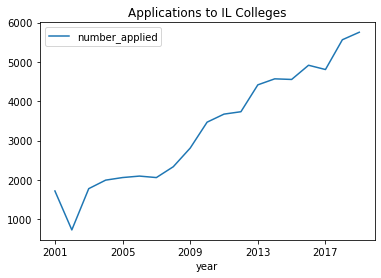

In [11]:
xaxis = df_ipeds_ex1['year'].unique().tolist()[::4]
plot_title = "Applications to IL Colleges"
df_ipeds_ex1.plot.line(x='year', y='number_applied', xticks=xaxis, title=plot_title);